In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data1.csv')

In [3]:
#print(dataset)
dataset.astype('float32')
dataset.describe()

,Day,Weight,Calories,Proteins,Fats,Carbons,Training,My weight,Lose_weight
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1699.575000,1898.936000,96.507000,87.488333,180.225333,0.400000,91.976667,-0.213333
std,8.803408,336.965165,158.547006,17.969312,20.093329,34.753190,0.498273,1.778935,0.402349
min,1.000000,1130.000000,1632.770000,67.910000,49.420000,70.240000,0.000000,89.600000,-1.100000
25%,8.250000,1544.250000,1836.100000,82.855000,74.565000,157.447500,0.000000,90.625000,-0.475000
50%,15.500000,1651.500000,1879.910000,93.385000,87.945000,181.580000,0.000000,91.800000,-0.200000
75%,22.750000,1868.750000,1950.252500,112.312500,98.005000,197.462500,1.000000,93.100000,0.000000
max,30.000000,2644.000000,2478.330000,143.660000,131.140000,262.630000,1.000000,96.000000,0.600000


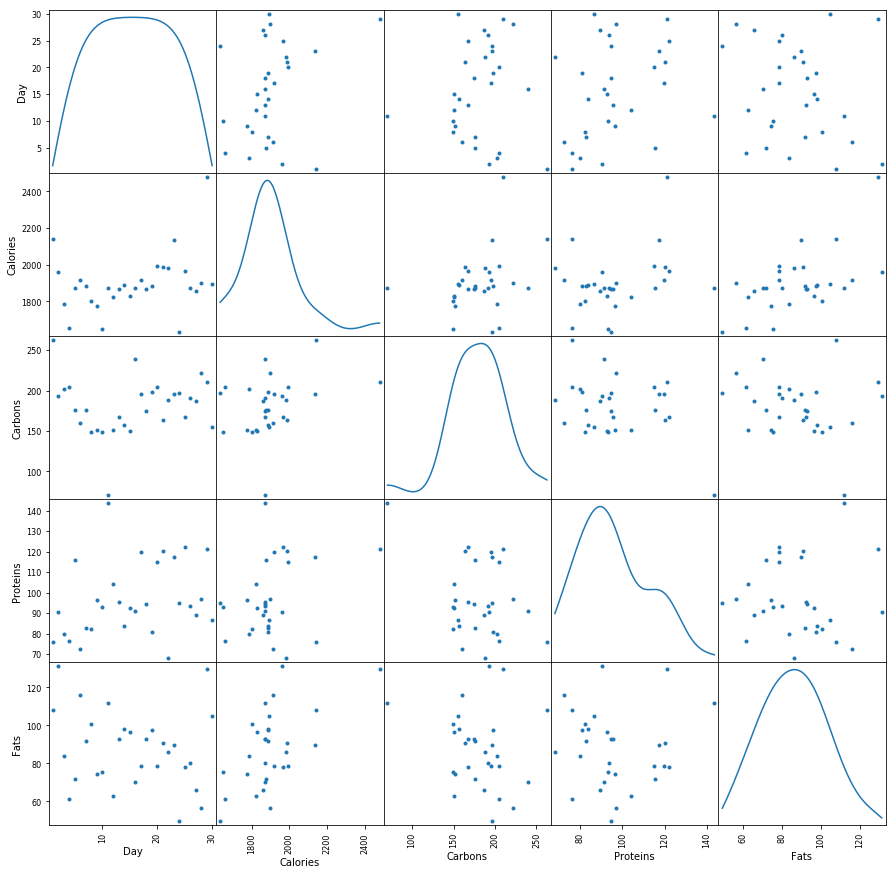

In [6]:
from pandas.tools.plotting import scatter_matrix
lst = ['Day', 'Calories', 'Carbons', 'Proteins', 'Fats']
scatter_matrix(dataset[lst], alpha=1.0, figsize=(15, 15), diagonal='kde')
plt.savefig('graph.pdf')
plt.show()

In [235]:
dataset['Lose'] = dataset['Lose_weight']<=0
dataset['Lose'] = dataset['Lose'].astype(int)

In [238]:
#print(dataset['Lose'])
print(list(dataset))

['Day', 'Weight', 'Calories', 'Proteins', 'Fats', 'Carbons', 'Training', 'My weight', 'Lose_weight', 'Lose']


In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_list = ['Weight', 'Calories', 'Proteins', 'Fats', 'Carbons', 'My weight', 'Lose_weight']
dataset[scale_list] = scaler.fit_transform(dataset[scale_list])


X_list = ['Weight', 'Calories', 'Proteins', 'Fats', 'Carbons', 'Training', 'My weight', 'Lose_weight']
X = dataset[X_list].as_matrix()
Y = dataset['Lose'].as_matrix()


In [249]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#X_scaled = preprocessing.scale(X_train[scale])
#Y_scaled = preprocessing.scale(Y_train[scale])

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, Y_train)
print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_test, Y_test))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices